<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Reading-modis-data" data-toc-modified-id="Reading-modis-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reading modis data</a></span><ul class="toc-item"><li><span><a href="#Installing-pyhdf" data-toc-modified-id="Installing-pyhdf-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Installing pyhdf</a></span></li><li><span><a href="#Downloading-the-data-and-reading-the-file" data-toc-modified-id="Downloading-the-data-and-reading-the-file-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Downloading the data and reading the file</a></span></li><li><span><a href="#Navigating-the-file-system" data-toc-modified-id="Navigating-the-file-system-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Navigating the file system</a></span></li><li><span><a href="#Using-pydf-to-get-metadata" data-toc-modified-id="Using-pydf-to-get-metadata-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Using pydf to get metadata</a></span></li><li><span><a href="#Find-all-the-datasets-using-pyhdf.SD.datasets()" data-toc-modified-id="Find-all-the-datasets-using-pyhdf.SD.datasets()-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Find all the datasets using pyhdf.SD.datasets()</a></span></li><li><span><a href="#open-one-of-the-datasets-(number-4,-EV_1KM_Emissive)-and-get-its-shape-and-data-type" data-toc-modified-id="open-one-of-the-datasets-(number-4,-EV_1KM_Emissive)-and-get-its-shape-and-data-type-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>open one of the datasets (number 4, EV_1KM_Emissive) and get its shape and data type</a></span></li><li><span><a href="#Get-the-first-row-of-the-first-channel-and-find-its-numpy-dtype" data-toc-modified-id="Get-the-first-row-of-the-first-channel-and-find-its-numpy-dtype-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Get the first row of the first channel and find its numpy dtype</a></span></li><li><span><a href="#get-all-the-rows-and-columns-for-the-first-channel" data-toc-modified-id="get-all-the-rows-and-columns-for-the-first-channel-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>get all the rows and columns for the first channel</a></span></li><li><span><a href="#Find-the-attributes-for-EV_1KM_Emissive" data-toc-modified-id="Find-the-attributes-for-EV_1KM_Emissive-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Find the attributes for EV_1KM_Emissive</a></span></li><li><span><a href="#Print-the-first-1000-characters-of-the-Metadata.0-string" data-toc-modified-id="Print-the-first-1000-characters-of-the-Metadata.0-string-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Print the first 1000 characters of the Metadata.0 string</a></span></li></ul></li><li><span><a href="#Now-plot-the-data-using-imshow" data-toc-modified-id="Now-plot-the-data-using-imshow-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Now plot the data using imshow</a></span><ul class="toc-item"><li><span><a href="#find-the-index-for-channel-30" data-toc-modified-id="find-the-index-for-channel-30-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>find the index for channel 30</a></span></li><li><span><a href="#Let-python-figure-this-out" data-toc-modified-id="Let-python-figure-this-out-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Let python figure this out</a></span></li><li><span><a href="#Read-channel-30-at-index-9-into-a-numpy-array-of-type-uint16" data-toc-modified-id="Read-channel-30-at-index-9-into-a-numpy-array-of-type-uint16-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Read channel 30 at index 9 into a numpy array of type uint16</a></span></li><li><span><a href="#Plot-the-channel-30-image" data-toc-modified-id="Plot-the-channel-30-image-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Plot the channel 30 image</a></span></li></ul></li><li><span><a href="#For-Wednesday-(don't-need-to-hand-in)" data-toc-modified-id="For-Wednesday-(don't-need-to-hand-in)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>For Wednesday (don't need to hand in)</a></span></li><li><span><a href="#Write-the-calibrated-channel-out-for-safekeeping" data-toc-modified-id="Write-the-calibrated-channel-out-for-safekeeping-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Write the calibrated channel out for safekeeping</a></span></li><li><span><a href="#Move-the-file-to-data_dir" data-toc-modified-id="Move-the-file-to-data_dir-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Move the file to data_dir</a></span></li></ul></div>

In [1]:
from pathlib import Path
from pyhdf.SD import SD, SDC
import pprint
import numpy as np
from matplotlib import pyplot as plt
import context
from a301.utils.data_read import download

******************************
context imported. Front of path:
/Users/phil/repos/a301_code

******************************



# Introduction

This notebook assumes that you have gone to the LAADS DAAC archive and downloaded a Modis Level1b 5 minute granule from the Aqua satellite (a MYD021KM hdf file).  Below we use the pyhdf module to read a single channel (channel 30) centered at 9.7 microns according to [the Modis channel listing](https://modis.gsfc.nasa.gov/about/specifications.php).  We plot the raw counts from that channel using the 
[matplotlib imshow](https://matplotlib.org/examples/images_contours_and_fields/image_demo.html) function to display the raw image

If you don't have a MYD021KM file you can grab mine by changing

     get_data=False
  
to True in the next cell.
     
     

In [2]:
get_data=False
if get_data:
    modis_file="MYD021KM.A2013222.2105.061.2018047235850.hdf"
    download(modis_file)

# Reading modis data

The general layout of a Modis data file is given in the [modis users guide](https://www.dropbox.com/s/ckd3dv4n7nxc9p0/modis_users_guide.pdf?dl=0) but we'll only need a fraction of the information in that manual.  Modis data is written in [hdf4 format](https://portal.hdfgroup.org/display/HDF4/HDF4), which in python can be read with the [pyhdf module](http://hdfeos.github.io/pyhdf/modules/SD.html#sd-module-key-features).


## Installing pyhdf

So far we have used the [anaconda default channel](https://conda.io/docs/user-guide/tasks/manage-channels.html) to install miniconda and other libraries.  Not every conda package is in the default channel.  For example, I have my own channel called [phaustin](https://anaconda.org/phaustin/repo) which I use to distribute software I write. Much of the conda software for the scientific community is distributed in the [conda-forge channel](https://conda-forge.org/) -- this includes the pyhdf module.

To install pyhdf from the conda-forge channel, the conda command looks like:

    conda install -c conda-forge pyhdf
    
On Macs, you will also need to update your jpeg library to match pyhdf:

    conda install -c conda-forge jpeg

## Downloading the data and reading the file

I downloaded my modis hdf file into the downloads folder in my home directory. The pathlib.Path object gives me a way to find that folder, regardless of who I am or whether I'm running on windows or a mac.

## Navigating the file system

I need to tell python where my satellite data is kept.  One possibility is to leave it
in the browser Downloads folder, which is usually beneath your home directory.
Here's how to do this with pathlib:

In [3]:
home = Path.home()
print(home)
data_dir = home / Path("Downloads")
print(data_dir)

/Users/phil
/Users/phil/Downloads


A better choice would be someplace within the a301 folder tree.  I know this notebook is
in the tree, so I can create a new folder called a301_code/data, and since I know I am
currently in a301/notebooks, I can find it like this:

In [4]:
#Path.cwd finds the "current working directory"
this_dir=Path.cwd()
#move up one one folder and down to data
data_dir = this_dir.parent / Path('data')

pathlib Path objects have a ton of features.  One of these is "globbing", which means using wildcard characters to find groups of files.

See http://pbpython.com/pathlib-intro.html and https://docs.python.org/3.6/library/pathlib.html

The next cell shows how globbing is used:

In [5]:
hdf_files=list(data_dir.glob("MYD021KM*2110*.hdf"))
hdf_files

[PosixPath('/Users/phil/repos/a301_code/data/MYD021KM.A2013222.2110.061.2018047235857.hdf')]

## Using pydf to get metadata

I can convert the filename from a Path object to a string object and pass it to pyhdf.SD
to find out how many datasets and attributes there are in the file

In the cell below I use [f-strings](https://realpython.com/python-f-strings/) to simplify the print command,
and split the string up across multiple lines by enclosing it in a tuple.  This works because
when python sees that the individual lines aren't separated by a comma, it concatenates them together.
The character \n means "newline"

Note that I need to construct the full path to the data file so pyhdf can find it. pyhdf was
written before pathlib (which was introduced in python 3.5), 
so I need to convert the Path object to a simple string using str()

In [6]:
file_name = str(data_dir / Path(hdf_files[0]))
print(f'reading {file_name}')
the_file = SD(file_name, SDC.READ)
stars='*'*50
print((f'\n{stars}\nnumber of datasets, number of attributes'
       f'={the_file.info()}\n{stars}\n'
       f'\nHere is the help file for the info funtion:\n'))
help(SD.info)

reading /Users/phil/repos/a301_code/data/MYD021KM.A2013222.2110.061.2018047235857.hdf

**************************************************
number of datasets, number of attributes=(31, 58)
**************************************************

Here is the help file for the info funtion:

Help on function info in module pyhdf.SD:

info(self)
    Retrieve information about the SD interface.
    
    Args::
    
      no argument
    
    Returns::
    
      2-element tuple holding:
        number of datasets inside the file
        number of file attributes
    
    C library equivalent : SDfileinfo



## Find all the datasets using pyhdf.SD.datasets()

The datasets method creates a dictionary holding pointers to the 31 datasets.
List them below:

In [7]:
datasets_dict = the_file.datasets()

for idx,sds in enumerate(datasets_dict.keys()):
    print(idx,sds)

0 Latitude
1 Longitude
2 EV_1KM_RefSB
3 EV_1KM_RefSB_Uncert_Indexes
4 EV_1KM_Emissive
5 EV_1KM_Emissive_Uncert_Indexes
6 EV_250_Aggr1km_RefSB
7 EV_250_Aggr1km_RefSB_Uncert_Indexes
8 EV_250_Aggr1km_RefSB_Samples_Used
9 EV_500_Aggr1km_RefSB
10 EV_500_Aggr1km_RefSB_Uncert_Indexes
11 EV_500_Aggr1km_RefSB_Samples_Used
12 Height
13 SensorZenith
14 SensorAzimuth
15 Range
16 SolarZenith
17 SolarAzimuth
18 gflags
19 EV_Band26
20 EV_Band26_Uncert_Indexes
21 Band_250M
22 Band_500M
23 Band_1KM_RefSB
24 Band_1KM_Emissive
25 Noise in Thermal Detectors
26 Change in relative responses of thermal detectors
27 DC Restore Change for Thermal Bands
28 DC Restore Change for Reflective 250m Bands
29 DC Restore Change for Reflective 500m Bands
30 DC Restore Change for Reflective 1km Bands


## open one of the datasets (number 4, EV_1KM_Emissive) and get its shape and data type

In [8]:
longwave_data = the_file.select('EV_1KM_Emissive') # select sds
print(longwave_data.info())
help(longwave_data.info)

('EV_1KM_Emissive', 3, [16, 2030, 1354], 23, 8)
Help on method info in module pyhdf.SD:

info() method of pyhdf.SD.SDS instance
    Retrieves information about the dataset.
    
    Args::
    
      no argument
    
    Returns::
    
      5-element tuple holding:
    
      - dataset name
      - dataset rank (number of dimensions)
      - dataset shape, that is a list giving the length of each
        dataset dimension; if the first dimension is unlimited, then
        the first value of the list gives the current length of the
        unlimited dimension
      - data type (one of the SDC.xxx values)
      - number of attributes defined for the dataset
    
    C library equivalent : SDgetinfo



## Get the first row of the first channel and find its numpy dtype

(unit16 is "unsigned 16 bit integer", which is how the modis raw counts are stored)

In [9]:
data_row = longwave_data[0,0,:] # get sds data
print(data_row.shape,data_row.dtype)

(1354,) uint16


## get all the rows and columns for the first channel

In [10]:
longwave_data[0,:,:]

array([[ 7816,  8244,  8169, ...,  8029,  7953,  7525],
       [ 8012,  8102,  8394, ...,  8112,  7766,  7834],
       [ 7994,  8219,  8249, ...,  7854,  7404,  7584],
       ...,
       [10054, 10084, 10302, ..., 11417, 11100,  9446],
       [ 9645, 10021, 10291, ..., 10127, 11718,  9750],
       [ 9943, 10339, 10705, ..., 10010, 11015, 10602]], dtype=uint16)

## Find the attributes for EV_1KM_Emissive

In [11]:
pprint.pprint(longwave_data.attributes() )

{'_FillValue': 65535,
 'band_names': '20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36',
 'long_name': 'Earth View 1KM Emissive Bands Scaled Integers',
 'radiance_offsets': [2467.264404296875,
                      2480.6005859375,
                      2478.176513671875,
                      2402.468505859375,
                      1077.44482421875,
                      1560.3333740234375,
                      2724.21826171875,
                      2317.48828125,
                      2610.015380859375,
                      1560.333251953125,
                      2035.9332275390625,
                      2119.08447265625,
                      2500.599365234375,
                      2499.093505859375,
                      2500.5205078125,
                      2495.89111328125],
 'radiance_scales': [6.9307534431573e-05,
                     0.00346690253354609,
                     7.626575097674504e-05,
                     8.990753121906891e-05,
                     3.1556141

## Print the first 1000 characters of the Metadata.0 string

Date, orbit number, etc. are stored in a long string attribute called 'StructMetadata.0'.  The \t character is a tab stop.

In [12]:
pprint.pprint(the_file.attributes()['StructMetadata.0'][:1000])

('GROUP=SwathStructure\n'
 '\tGROUP=SWATH_1\n'
 '\t\tSwathName="MODIS_SWATH_Type_L1B"\n'
 '\t\tGROUP=Dimension\n'
 '\t\t\tOBJECT=Dimension_1\n'
 '\t\t\t\tDimensionName="Band_250M"\n'
 '\t\t\t\tSize=2\n'
 '\t\t\tEND_OBJECT=Dimension_1\n'
 '\t\t\tOBJECT=Dimension_2\n'
 '\t\t\t\tDimensionName="Band_500M"\n'
 '\t\t\t\tSize=5\n'
 '\t\t\tEND_OBJECT=Dimension_2\n'
 '\t\t\tOBJECT=Dimension_3\n'
 '\t\t\t\tDimensionName="Band_1KM_RefSB"\n'
 '\t\t\t\tSize=15\n'
 '\t\t\tEND_OBJECT=Dimension_3\n'
 '\t\t\tOBJECT=Dimension_4\n'
 '\t\t\t\tDimensionName="Band_1KM_Emissive"\n'
 '\t\t\t\tSize=16\n'
 '\t\t\tEND_OBJECT=Dimension_4\n'
 '\t\t\tOBJECT=Dimension_5\n'
 '\t\t\t\tDimensionName="10*nscans"\n'
 '\t\t\t\tSize=2030\n'
 '\t\t\tEND_OBJECT=Dimension_5\n'
 '\t\t\tOBJECT=Dimension_6\n'
 '\t\t\t\tDimensionName="Max_EV_frames"\n'
 '\t\t\t\tSize=1354\n'
 '\t\t\tEND_OBJECT=Dimension_6\n'
 '\t\t\tOBJECT=Dimension_7\n'
 '\t\t\t\tDimensionName="2*nscans"\n'
 '\t\t\t\tSize=406\n'
 '\t\t\tEND_OBJECT=Dimension_7\n'

# Now plot the data using imshow

In [13]:
longwave_bands = the_file.select('Band_1KM_Emissive')

In [14]:
longwave_bands.attributes()

{'long_name': '1KM Emissive Band Numbers for Subsetting'}

Note that only channels 20 to 36 are in the Emissive dataset (see [the Modis channel listing](https://modis.gsfc.nasa.gov/about/specifications.php))

## find the index for channel 30

Count the following and convince yourself that channel 30 is index 9, starting from 0

In [15]:
band_nums=longwave_bands.get()
print(f'here are the modis channels in the emissive dataset \n{band_nums}')

here are the modis channels in the emissive dataset 
[20. 21. 22. 23. 24. 25. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.]


## Let python figure this out

We don't want to have to count, so use numpy.searchsorted to find the the index with value closest to 30

We need to turn that index (type int64) into a plain python int so it can be used to specify the channel
(float doesn't work)

In [16]:
ch30_index=np.searchsorted(band_nums,30.)
print(ch30_index.dtype)
ch30_index = int(ch30_index)
print(f'channel 30 is located at index {ch30_index}')

int64
channel 30 is located at index 9


## Read channel 30 at index 9 into a numpy array of type uint16

In [17]:
ch30_data = longwave_data[ch30_index,:,:]
print(ch30_data.shape)
print(ch30_data.dtype)

(2030, 1354)
uint16


## Plot the channel 30 image

Use [imshow with a colorbar](https://matplotlib.org/gallery/color/colorbar_basics.html#sphx-glr-gallery-color-colorbar-basics-py)

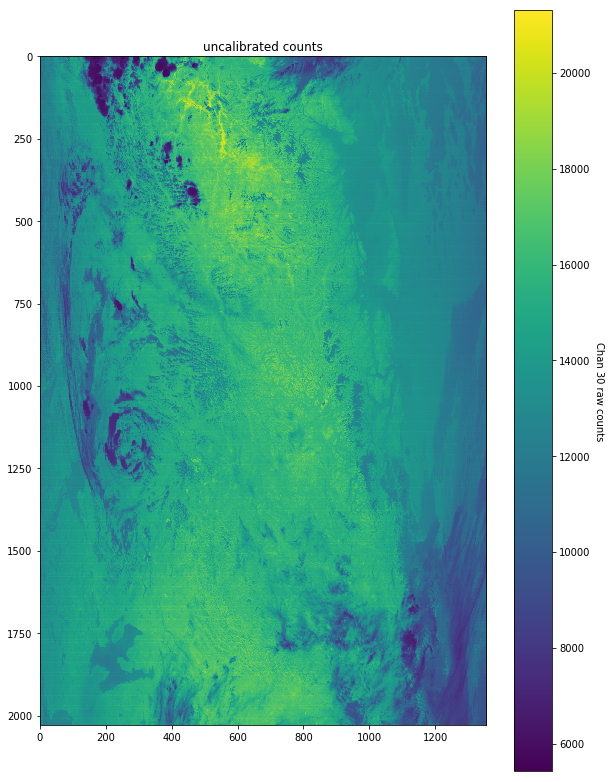

In [18]:
fig,ax = plt.subplots(1,1,figsize = (10,14))
CS=ax.imshow(ch30_data)
cax=fig.colorbar(CS)
ax.set_title('uncalibrated counts')
#
# add a label to the colorbar and flip it around 270 degrees
#
out=cax.ax.set_ylabel('Chan 30 raw counts')
out.set_verticalalignment('bottom')
out.set_rotation(270)

# For Wednesday (don't need to hand in)

To turn the raw counts into pixel radiances, you need to apply equation 5.8 on p. 36 of the 
[modis users guide](https://www.dropbox.com/s/ckd3dv4n7nxc9p0/modis_users_guide.pdf?dl=0):

$Radiances = (RawData - offset) \times scale$

We have just read the RawData,  the offset and the scale are stored in two vectors that are attributes of the Emissive dataset.  Make a version of the figure above, but plot Channel 30 radiance (in W/m^2/micron/sr), rather than raw counts.

Hint:  Here is how you get the scale and offset for Channel 30.




In [19]:
scales=longwave_data.attributes()['radiance_scales']
offsets=longwave_data.attributes()['radiance_offsets']
ch30_scale=scales[ch30_index]
ch30_offset=offsets[ch30_index]
print(f'scale: {ch30_scale}, offset: {ch30_offset}')

scale: 0.0004063234373461455, offset: 1560.333251953125


In [24]:
ch30_calibrated =(ch30_data - ch30_offset)*ch30_scale

['CHAR',
 'CHAR8',
 'COMP_DEFLATE',
 'COMP_NBIT',
 'COMP_NONE',
 'COMP_RLE',
 'COMP_SKPHUFF',
 'COMP_SZIP',
 'COMP_SZIP_EC',
 'COMP_SZIP_NN',
 'COMP_SZIP_RAW',
 'CREATE',
 'FILL',
 'FLOAT32',
 'FLOAT64',
 'INT16',
 'INT32',
 'INT8',
 'NOFILL',
 'READ',
 'TRUNC',
 'UCHAR',
 'UCHAR8',
 'UINT16',
 'UINT32',
 'UINT8',
 'UNLIMITED',
 'WRITE',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'equivNumericTypes']

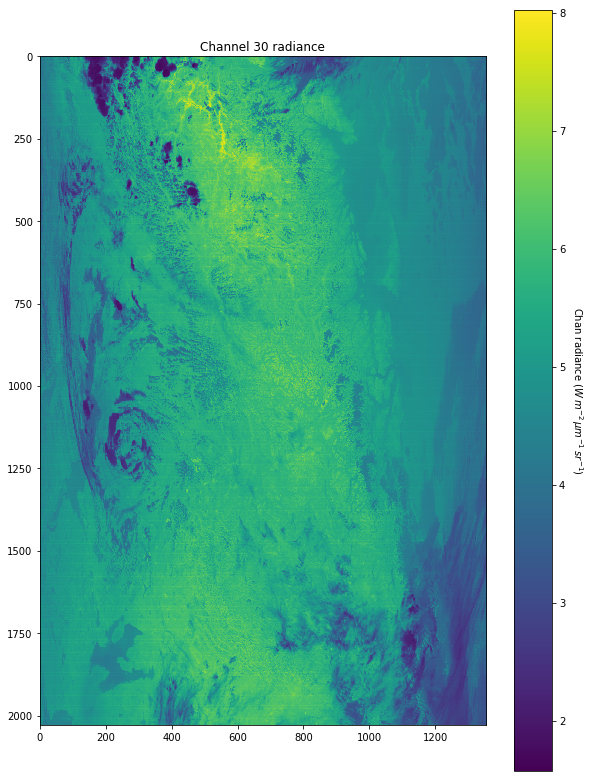

In [29]:
fig,ax = plt.subplots(1,1,figsize = (10,14))
CS=ax.imshow(ch30_calibrated)
cax=fig.colorbar(CS)
ax.set_title('Channel 30 radiance')
#
# add a label to the colorbar and flip it around 270 degrees
#
out=cax.ax.set_ylabel('Chan radiance $(W\,m^{-2}\,\mu m^{-1}\,sr^{-1})$')
out.set_verticalalignment('bottom')
out.set_rotation(270)

# Write the calibrated channel out for safekeeping

Follow the example here: https://hdfeos.org/software/pyhdf.php

In [37]:
# Create an HDF file
outname="ch30_out.hdf"
sd = SD(outname, SDC.WRITE | SDC.CREATE)

# Create a dataset
sds = sd.create("ch30", SDC.FLOAT64, ch30_calibrated.shape)

# Fill the dataset with a fill value
sds.setfillvalue(0)

# Set dimension names
dim1 = sds.dim(0)
dim1.setname("row")
dim2 = sds.dim(1)
dim2.setname("col")

# Assign an attribute to the dataset
sds.units = "W/m^2/micron/sr"

# Write data
sds[:,:] = ch30_calibrated

# Close the dataset
sds.endaccess()

# Flush and close the HDF file
sd.end()

# Move the file to data_dir

In [38]:
local_file = Path.cwd() / Path(outname)
to_file = data_dir / Path(outname)
local_file.rename(to_file)